# Lab 2
# Parametric regression
# ---------------------------------------------------

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li> Introduction </li>
    <li> Cross Validation </li>
    <li> Simple Linear Regression </li>
    <li> Multiple Linear Regression </li>
    <li> Non-Linear Regression </li>
    <li> Linear Regression with Regularization </li>
    <li> Comparison of the results obtained with the different models </li>
</ol>

</div>

<hr>


## 1. Introduction

Suppose you want to build a parametric regression model on a set of cases, where each case is described in terms of several variables. Without knowing anything else about the data set, give a reasoned justification:

a) Explain in your own words what is the main difference between supervised and unsupervised learning methods.  Give an example of the application of each type of method. Describe briefly the input and output variables you would consider in each example.

b) Explain in your own words the main difference between a linear and a non-linear model.

c)  Explain the concept of overfitting and generalization. If you wish, you can support your answer with an outline or drawing. Explain in your own words how you could get the designed model to generalize well.


For the development of this second lab, the database "Pima Indian Diabetes" already pre-processed will be analyzed, where the rows of the file correspond to the cases and the columns to the variables. Important, you should use the preprocessed dataset.

For this practice, the data will be divided into two subsets: training and test. In addition, the validation scheme called k-fold cross validation will be considered.

#### Note that in this data, the goal is to predict, based on diagnostic measurements, whether a patient has diabetes. However, in this lab, we will deal with a regression task, this is, we will change the output

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection   
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

from sklearn import model_selection   
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## 2. Cross-validation

For this practice, the validation scheme called k-fold cross validation will be considered. Remember that in this approach, the available cases are randomly divided into k subsets of the same size called "folds".

**a) Indicate what a k-fold cross-validation scheme can be used for.**
A k-fold cross-validation scheme is a technique used in machine learning and statistics to assess the performance and generalization ability of a predictive model. It is particularly useful for estimating how well a model will perform on unseen data. Here's what a k-fold cross-validation scheme can be used for:

1. **Model Evaluation:** It helps in evaluating the performance of a machine learning model by providing multiple estimates of its accuracy or error metrics. This is important because a single train-test split might not be representative of the model's true performance.

2. **Hyperparameter Tuning:** Cross-validation can be used to tune hyperparameters of a machine learning model. By running cross-validation with different hyperparameter settings, you can identify the values that lead to the best model performance.

3. **Bias-Variance Trade-off:** It allows you to assess the bias and variance of a model. A model with high bias underfits the data, while a model with high variance overfits the data. Cross-validation helps in finding the right balance.

4. **Model Selection:** When comparing multiple models, cross-validation helps in selecting the best-performing model. You can train and evaluate multiple models using the same cross-validation procedure and choose the one with the best performance.

5. **Avoiding Overfitting:** Cross-validation helps in detecting overfitting. If a model performs well on the training data but poorly on the validation data, it's a sign of overfitting, and cross-validation can help identify this issue.

The basic idea behind k-fold cross-validation is to divide the dataset into k equally sized "folds" or subsets. The model is trained on k-1 of these folds and tested on the remaining fold. This process is repeated k times, each time using a different fold as the test set. The results are then averaged or aggregated to provide a more robust estimate of the model's performance.

Common values for k include 5, 10, or even higher numbers. The choice of k depends on the size of the dataset and the trade-off between computation time and the reliability of the performance estimate.

**b) Justify reasonably which models will need to follow a cross-validation scheme.**
Cross-validation is a valuable technique for assessing and training machine learning models, but not all models necessarily require it. The decision to use cross-validation should be based on various factors, including the complexity of the model, the amount of available data, and the specific goals of the modeling task. Here are some reasonable justifications for when to use cross-validation:

1. **Limited Data:** Cross-validation is particularly important when you have a limited amount of data. With a small dataset, it's easy for a model to overfit (memorize the training data) or underfit (fail to capture patterns). Cross-validation helps mitigate this problem by repeatedly assessing the model's performance on different subsets of the data.

2. **Complex Models:** When you're working with complex models, such as deep neural networks, support vector machines with non-linear kernels, or ensemble methods, there's a higher risk of overfitting. Cross-validation can help you understand how well these models generalize to unseen data and whether they need regularization or other adjustments.

3. **Hyperparameter Tuning:** Cross-validation is crucial for hyperparameter tuning. Different combinations of hyperparameters can significantly impact a model's performance. By using cross-validation, you can systematically search for the best hyperparameters while ensuring that the chosen values generalize well to different data subsets.

4. **Model Comparison:** If you're comparing multiple models or algorithms to determine which one performs the best for your specific problem, cross-validation is essential. It provides a fair and unbiased way to compare models, as it evaluates their performance across multiple data splits.

5. **Assessing Model Stability:** Cross-validation can help assess the stability of a model's performance. If a model performs consistently well across different folds, it is more likely to be a robust and reliable choice.

6. **Imbalanced Datasets:** When dealing with imbalanced datasets, where one class is significantly more prevalent than others, cross-validation can help ensure that the model performs well on minority classes by evaluating its performance on different subsets of data.

7. **Detecting Data Issues:** Cross-validation can reveal potential data issues, such as data leakage, outliers, or data drift, as inconsistent performance across folds may indicate problems with the dataset or the modeling process.

8. **Confidence in Results:** Cross-validation provides a more reliable estimate of a model's performance compared to a single train-test split. It can give you greater confidence that the reported performance metrics are representative of the model's true capabilities.

In summary, while not all models strictly require cross-validation, it is a valuable tool in many scenarios, especially when dealing with limited data, complex models, or when conducting tasks like hyperparameter tuning and model comparison. It helps ensure that your machine learning models are robust, generalizable, and perform well on unseen data.

**c) As discussed in the theoretical classes, it is common in health to have a different number of cases in each class (unbalanced classes). Taking into account the database of this practice, please explain in detail the figure of merit you would consider in order to analyze the results with different parametric schemes.**



In [2]:
#Load data from csv and store it in a dataframe
data = pd.read_csv("pima_indian_diabetes_preprocess.csv") #We can change this database

In [3]:
#Define the input and output data
#Glucose is the dependent variable in this lab
y = data['Glucose']
X = data.drop('Glucose', axis=1)

In [4]:
X_cols = X.columns

In [5]:
# Show the first rows of the input data
X.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeCategory_Adult1,AgeCategory_Adult2,AgeCategory_Elderly,Outcome
0,6,72.0,35.000000,79.799479,33.6,0.627,50,0,1,0,1
1,1,66.0,29.000000,79.799479,26.6,0.351,31,1,0,0,0
2,8,64.0,20.536458,79.799479,23.3,0.672,32,1,0,0,1
3,1,66.0,23.000000,94.000000,28.1,0.167,21,1,0,0,0
4,0,40.0,35.000000,168.000000,43.1,2.288,33,1,0,0,1


In [6]:
# Show the first rows of the output data
y.head()

0    148.0
1     85.0
2    183.0
3     89.0
4    137.0
Name: Glucose, dtype: float64

In [7]:
# Define the Train (70% of the samples) and Test sets (30% of the samples) - tip: train_test_split
# Please, use the option random state to obtain always the same results
# For more details, check: https://numpy.org/doc/1.16/reference/generated/numpy.random.RandomState.html

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

print('Tamaños de los subsets:')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Tamaños de los subsets:
(700, 11)
(700,)
(300, 11)
(300,)


In [8]:
# Show the first rows of X_train
X_train.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeCategory_Adult1,AgeCategory_Adult2,AgeCategory_Elderly,Outcome
140,3,78.0,20.536458,79.799479,21.1,0.268,55,0,1,0,0
409,1,68.0,49.000000,579.000000,42.4,0.702,28,1,0,0,1
63,2,58.0,34.000000,128.000000,25.4,0.699,24,1,0,0,0
178,5,78.0,20.536458,79.799479,45.0,0.190,47,0,1,0,0
732,2,88.0,37.000000,120.000000,44.5,0.646,24,1,0,0,1


In [9]:
# Show the first rows of X_test
X_test.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeCategory_Adult1,AgeCategory_Adult2,AgeCategory_Elderly,Outcome
890,2,69.669838,35.000000,163.615557,33.149524,0.450356,22,1,0,0,1
694,2,60.000000,20.536458,79.799479,23.500000,0.191000,25,1,0,0,0
798,4,75.611207,26.892002,206.719205,43.368884,1.024475,52,0,0,0,1
147,2,64.000000,35.000000,119.000000,30.500000,1.400000,34,1,0,0,0
858,8,84.896023,15.575666,79.799479,31.029376,1.121292,48,0,1,0,1


#### Define variables for the following figure of merits:  R^2, MAE, MSE and RMSE

In [10]:
# Below you can find some examples:
r2_results = []
mae_results = []
mse_results = []
rmse_results = []

## 3. Simple Linear Regression

Linear regression allows us to establish the relationship between the input and the output. This technique is used when the relationship between the variables is linear. 

Indicate:

a) What is the output (dependent) variable that you could consider to address a linear regression problem?

b) Indicate whether the performance obtained in the test set change after normalizing the variables.



In [17]:
# Build a simple linear regression model and show the prediction results in the test sets based on R2, MAE, MSE and RMS

def simple_linear_reg(X_train, X_test, feature):
    
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(np.array(X_train[feature]).reshape(-1,1), y_train)

    # Show the coefficient (slope)
    coef = model.coef_
    
    # Show the intercept
    inte = model.intercept_

    # Predict using the test set
    y_pred = model.predict(np.array(X_test[feature]).reshape(-1,1))
    
    return coef, inte

In [11]:
# Simple linear regression - Tip: LinearRegression()
# Train the model using the training set, consider the feature 'Age' as the input and the output

# Create and fit the linear regression model
model = LinearRegression()
model.fit(np.array(X_train['Age']).reshape(-1,1), y_train)

# Show the intercept
intercept = model.intercept_
print("Intercept:", intercept)

# Show the coefficient (slope)
coefficients = model.coef_
print("Coefficient (Slope):", coefficients[0])

# Predict using the test set
y_pred = model.predict(np.array(X_test['Age']).reshape(-1,1))

# Compute R-squared (R²)
r2 = r2_score(y_test, y_pred)
r2_results.append(r2)
print("R-squared (R²):", r2)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
mae_results.append(mae)
print("Mean Absolute Error (MAE):", mae)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mse_results.append(mse)
print("Mean Squared Error (MSE):", mse)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
rmse_results.append(rmse)
print("Root Mean Squared Error (RMSE):", rmse)

Intercept: 102.18290547430928
Coefficient (Slope): 0.6788563560609726
R-squared (R²): 0.08343594133640131
Mean Absolute Error (MAE): 25.161877475207124
Mean Squared Error (MSE): 966.4093223206851
Root Mean Squared Error (RMSE): 31.08712470333474


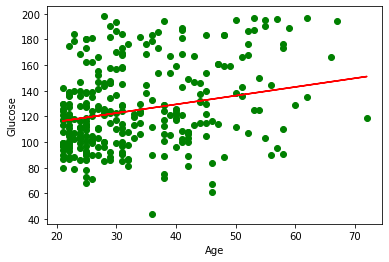

In [12]:
# Plot the samples and the predict
plt.scatter(X_test['Age'],y_test,color='g')
plt.plot(X_test['Age'], y_pred,color='r')
plt.xlabel('Age')
plt.ylabel("Glucose")
plt.show()

In [13]:
# Normalize using StandardScaler() - Important, note that you have two sets train and test
from sklearn.preprocessing import StandardScaler

print('\n---Sin normalizar---')
print('Primeras 10 filas y 5 columnas de cada subset:')
print(X_train)

print(X_test)

# Normalizamos la data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('\n---Normalizar---')
print('Primeras 10 filas y 5 columnas de cada subset:')
print(X_train)
print(X_test)


---Sin normalizar---
Primeras 10 filas y 5 columnas de cada subset:
     Pregnancies  BloodPressure  SkinThickness     Insulin        BMI  \
140            3      78.000000      20.536458   79.799479  21.100000   
409            1      68.000000      49.000000  579.000000  42.400000   
63             2      58.000000      34.000000  128.000000  25.400000   
178            5      78.000000      20.536458   79.799479  45.000000   
732            2      88.000000      37.000000  120.000000  44.500000   
..           ...            ...            ...         ...        ...   
924            0      69.105469      20.536458   79.799479  43.763962   
223            7      60.000000      33.000000  190.000000  28.800000   
271            2      62.000000      32.000000   56.000000  25.200000   
474            4      64.000000      20.536458   79.799479  28.900000   
355            9      88.000000      20.536458   79.799479  30.400000   

     DiabetesPedigreeFunction  Age  AgeCategory_Adult1

In [14]:
X_train = pd.DataFrame(X_train)
X_train.columns = X_cols

In [15]:
X_test = pd.DataFrame(X_test)
X_test.columns = X_cols

In [16]:
# Build a simple linear regression model and show the prediction results in the test sets based on R2, MAE, MSE and RMSE
# Create and fit the linear regression model
model = LinearRegression()
model.fit(np.array(X_train['Age']).reshape(-1,1), y_train)

# Show the intercept
intercept = model.intercept_
print("Intercept:", intercept)

# Show the coefficient (slope)
coefficients = model.coef_
print("Coefficient (Slope):", coefficients[0])

# Predict using the test set
y_pred = model.predict(np.array(X_test['Age']).reshape(-1,1))

# Compute R-squared (R²)
r2 = r2_score(y_test, y_pred)
r2_results.append(r2)
print("R-squared (R²):", r2)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
mae_results.append(mae)
print("Mean Absolute Error (MAE):", mae)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mse_results.append(mse)
print("Mean Squared Error (MSE):", mse)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
rmse_results.append(rmse)
print("Root Mean Squared Error (RMSE):", rmse)

Intercept: 125.43082628501448
Coefficient (Slope): 7.810925950444334
R-squared (R²): 0.08343594133640131
Mean Absolute Error (MAE): 25.161877475207124
Mean Squared Error (MSE): 966.4093223206851
Root Mean Squared Error (RMSE): 31.08712470333474


## 4. Multiple Linear Regresion

In this section we will analyze:

a) How the value of the estimators, the correlation coefficient and the figure of merit change when we change the number of explanatory variables.

b) The most relevant feautures. Explain in detail the process you have followed and justify which features are most relevant in this database.

Note: you may have to repeat this section with a different number of variables in order to draw valid conclusions.

In [22]:
def multiple_linear_reg(X_train, X_test):
    
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Show the coefficient (slope)
    coef = model.coef_
    
    # Show the intercept
    inte = model.intercept_

    # Predict using the test set
    y_pred = model.predict(X_test)
    
    return coef, inte, y_pred

In [17]:
# Build a simple linear regression model and show the prediction results in the test sets based on R2, MAE, MSE and RMS

def simple_linear_reg(X_train, X_test, feature):
    
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(np.array(X_train[feature]).reshape(-1,1), y_train)

    # Show the coefficient (slope)
    coef = model.coef_
    
    # Show the intercept
    inte = model.intercept_

    # Predict using the test set
    y_pred = model.predict(np.array(X_test[feature]).reshape(-1,1))
    
    return coef, inte

In [18]:
coef_list = []
inte_list = []

for col in X_cols:
    coef, inte = simple_linear_reg(X_train, X_test, col)
    coef_list.append(coef[0])
    inte_list.append(inte)

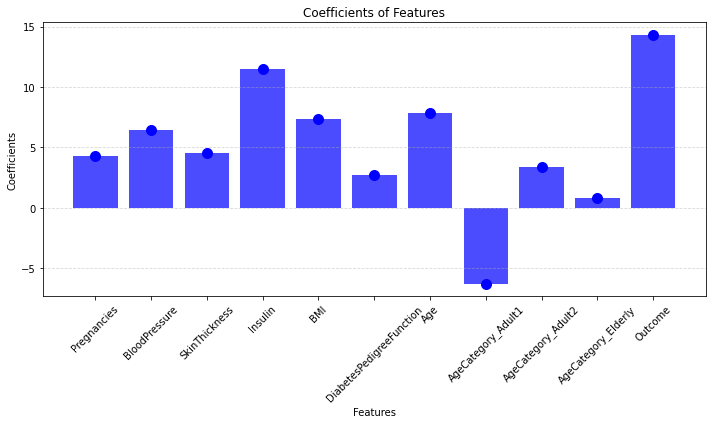

In [19]:
# Show and plot the values of the coefficients. Comment the results
import numpy as np
import matplotlib.pyplot as plt

# Create a bar plot or scatter plot
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size

# Bar plot
plt.bar(X_cols, coef_list, color='b', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Features')
plt.xticks(rotation=45)  # Optional: Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Optional: Add a grid

# Scatter plot (alternative)
plt.scatter(X_cols, coef_list, color='b', s=100)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Features')

plt.tight_layout()
plt.show()

In [ ]:
print(coef_list)

You can explore results when: (1) normalizing data; (2) discarding some features based on their coefficients; (3) using other approaches such stats

### Use stastsmodels and compare the results

In [20]:

def linear_reg(X_train, X_test, feature):
    
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(np.array(X_train[feature]).reshape(-1,1), y_train)

    # Show the coefficient (slope)
    coef = model.coef_
    
    # Show the intercept
    inte = model.intercept_

    # Predict using the test set
    y_pred = model.predict(np.array(X_test[feature]).reshape(-1,1))
    
    return coef, inte

In [21]:
# Tips:
# import statsmodels.api as sm
# mod = sm.OLS()
# res = mod.fit()
# print(res.summary())

## 5. Non-linear regression


Many of the relationships between variables we study are non-linear. As we have seen in theory, we can highlight the functions logarithmic, inverse, quadratic, cubic, power, exponential, etc.

a) Include which non-linear functions best fit the available data.

b) Indicate whether the performance obtained in the test set changes after normalizing the variables.


In [23]:
# Non-linear regression with a defined degree
# TIPS:
from sklearn.preprocessing import PolynomialFeatures

#  (1) poly_reg = PolynomialFeatures(degree=4) # We can change the degree
poly_reg = PolynomialFeatures(degree=4)
X_train_4 = poly_reg.fit_transform(X_train)
X_test_4 = poly_reg.transform(X_test)

#  (2) Use fit_transform and transform and then LinearRegression(). Define coefficients, intercept and y_pred
coef, inter, y_pred = multiple_linear_reg(X_train, X_test)

#  (3) Print the shape of the transformed features
print('X_train new shape', X_train.shape)
print('X_test new shape', X_test.shape)

# Compute R-squared (R²)
r2 = r2_score(y_test, y_pred)
r2_results.append(r2)
print("R-squared (R²):", r2)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
mae_results.append(mae)
print("Mean Absolute Error (MAE):", mae)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mse_results.append(mse)
print("Mean Squared Error (MSE):", mse)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
rmse_results.append(rmse)
print("Root Mean Squared Error (RMSE):", rmse)

X_train new shape (700, 11)
X_test new shape (300, 11)
R-squared (R²): 0.37589799662662604
Mean Absolute Error (MAE): 20.382019992285215
Mean Squared Error (MSE): 658.042379512953
Root Mean Squared Error (RMSE): 25.652336726172784


In [22]:
def multiple_linear_reg(X_train, X_test):
    
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Show the coefficient (slope)
    coef = model.coef_
    
    # Show the intercept
    inte = model.intercept_

    # Predict using the test set
    y_pred = model.predict(X_test)
    
    return coef, inte, y_pred

Degree: 1 R²: 0.3418208221484021
Degree: 2 R²: -3.994989389209932e+22
Degree: 3 R²: -4.1265184307447176e+22
Degree: 4 R²: -38083.35691895964
Degree: 5 R²: -4055.9136237073812


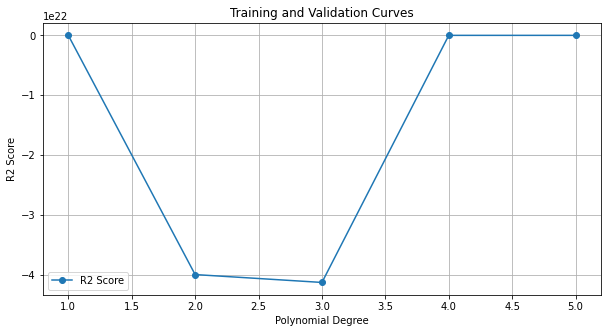

In [24]:
# Use cross validation for finding the degree, train and predict with the best degree. Compute R2, MAE, MSE, RMSE.
# IMPORTANT:  plot the train and the validations curve and analyze them.
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline

# Define a list of degrees to test
degrees = [1, 2, 3, 4, 5]
cvr2_scores = []
for degree in degrees:
    # Create polynomial features
    poly_reg = PolynomialFeatures(degree=degree)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.transform(X_test)

    # Create a linear regression model
    model = LinearRegression()

    # Perform cross-validation to find the best model
    cv_r2 = np.mean(cross_val_score(model, X_train_poly, y_train, scoring='r2', cv=3))
    cvr2_scores.append(cv_r2)
    print('Degree:', degree, 'R²:', cv_r2)
    
# Plotting the training and validation curves for R2
plt.figure(figsize=(10, 5))
plt.plot(degrees, cvr2_scores, marker='o', label='R2 Score')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2 Score')
plt.title('Training and Validation Curves')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Best degree through cross validation
best_degree = degrees[np.argmax(cvr2_scores)]
best_model = make_pipeline(PolynomialFeatures(degree=best_degree), LinearRegression())

print("Best Degree:", best_degree)
print("Best R2 Score:", max(cvr2_scores))

Best Degree: 1
Best R2 Score: 0.3418208221484021


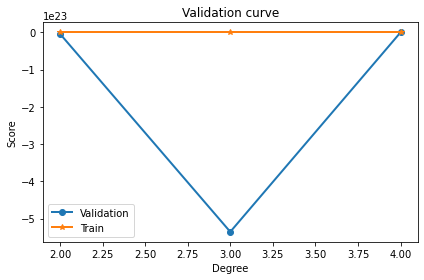

In [26]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline

degrees = np.arange(2, 5)

model = make_pipeline(PolynomialFeatures(), LinearRegression())

# The parameter to vary is the "degrees" on the pipeline step
# "polynomialfeatures"
train_scores, validation_scores = validation_curve(
                 model, X_train, y_train,
                 param_name='polynomialfeatures__degree',
                 param_range=degrees)

# Plot the mean train error and validation error across folds
plt.figure(figsize=(6, 4))
plt.plot(degrees, validation_scores.mean(axis=1), lw=2,
         label='Validation', marker='o')
plt.plot(degrees, train_scores.mean(axis=1), lw=2, label='Train',marker='*')
plt.legend(loc='best')
plt.xlabel('Degree')
plt.ylabel('Score')
plt.title('Validation curve')
plt.tight_layout()

## 6. Linear regression with regularization

a) Indicate whether the performance obtained in the test set changes when changing the regularization considered.

b) Justify which features are more relevant for these models

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [28]:
# Use a Ridge Regression

ridge = Ridge()

# Values for alpha
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20,30]}

# Use grid search for ridge regression and then train and predict and provide R2, MAE, MSE, RMSE values

# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Train the Ridge model with the best alpha
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# Compute R-squared (R²)
r2 = r2_score(y_test, y_pred)
r2_results.append(r2)
print("R-squared (R²):", r2)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
mae_results.append(mae)
print("Mean Absolute Error (MAE):", mae)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mse_results.append(mse)
print("Mean Squared Error (MSE):", mse)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
rmse_results.append(rmse)
print("Root Mean Squared Error (RMSE):", rmse)

Best Alpha: 20
R-squared (R²): 0.37729844863875495
Mean Absolute Error (MAE): 20.379558601447723
Mean Squared Error (MSE): 656.5657670850583
Root Mean Squared Error (RMSE): 25.623539316126067


In [ ]:
# Use cross validation for finding the degree, train and predict with the best degree. Compute R2, MAE, MSE, RMSE.
# IMPORTANT:  plot the train and the validations curve and analyze them.
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline

# Define a list of degrees to test
degrees = [1, 2, 3, 4, 5]
r2_scores = []
for degree in degrees:
    print('\n', degree)
    # Create polynomial features
    poly_reg = PolynomialFeatures(degree=degree)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.transform(X_test)

    # Create a linear regression model
    model = LinearRegression()

    # Perform cross-validation to find the best model
    cv_r2 = np.mean(cross_val_score(model, X_train_poly, y_train, scoring='r2', cv=3))
    print(cv_r2)

In [27]:
# Use cross validation for finding the degree, train and predict with the best degree. Compute R2, MAE, MSE, RMSE.
# IMPORTANT:  plot the train and the validations curve and analyze them.
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline

# Define a list of degrees to test
degrees = [1, 2, 3, 4, 5]
cvr2_scores = []
for degree in degrees:
    # Create polynomial features
    poly_reg = PolynomialFeatures(degree=degree)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.transform(X_test)

    # Create a linear regression model
    model = LinearRegression()

    # Perform cross-validation to find the best model
    cv_r2 = np.mean(cross_val_score(model, X_train_poly, y_train, scoring='r2', cv=3))
    cvr2_scores.append(cv_r2)
    
# Plotting the training and validation curves for R2
plt.figure(figsize=(10, 5))
plt.plot(degrees, r2_scores, marker='o', label='R2 Score')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2 Score')
plt.title('Training and Validation Curves')
plt.legend()
plt.grid(True)
plt.show()


 1

 2

 3

 4

 5


Which is the best value of the regularization parameter?

In [1]:
# Use a Lasso Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso_regression = Lasso()

# Values for alpha
parameters = {"alpha":[1e-4, 1e-2, 1, 5, 10, 20]}

# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(lasso_regression, parameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Train the Lasso model with the best alpha
lasso_regression = Lasso(alpha=best_alpha)
lasso_regression.fit(X_train, y_train)
y_pred = lasso_regression.predict(X_test)

# Compute R-squared (R²)
r2 = r2_score(y_test, y_pred)
r2_results.append(r2)
print("R-squared (R²):", r2)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
mae_results.append(mae)
print("Mean Absolute Error (MAE):", mae)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mse_results.append(mse)
print("Mean Squared Error (MSE):", mse)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
rmse_results.append(rmse)
print("Root Mean Squared Error (RMSE):", rmse)

NameError: name 'X_train' is not defined

Which is the best value of the regularization parameter?

## 7. Comparison of the results obtained with the different models


Provide in a table the performance measures  obtained both in the validation and test set  by the different models designed.

In view of the results obtained, please answer, if possible, the following questions:

a) Justify whether the fact of normalizing the feature's values influence the results obtained.

b) Reasonably justify whether you would use a linear or non-linear parametric scheme. Indicate and justify the scheme that provides the best performance in the set of tests.

c) Indicate and justifiy which are the most relevant feautures as well as the procedure to identify them.

d) Indicate and justify  whether the fact of making a single partition of the cases in the training and test sets can influence the results obtained. Starting from the original data, make a new partition of the cases in the training and test sets. Select one of the analyzed models (indicate the chosen models) and obtain again the figures of merti. Comment the obtained results. 

In [32]:
# Tips, you should provide a table similar as the one provided here

results = pd.DataFrame()

results["R2 in the test set"] = r2_results
results["MAE in the test set"] = mae_results
results["MSE in the test set"] = mse_results
results["RMSE in the test set"] = rmse_results

#results
results["Models"] = ["Linear Regression (LR) ", "LR Normalized", "Non-LR Normalized", "Rigde", "Lasso"]
results.set_index("Models", inplace = True)


In [33]:
results

,R2 in the test set,MAE in the test set,MSE in the test set,RMSE in the test set
Models,,,,
Linear Regression (LR),0.083436,25.161877,966.409322,31.087125
LR Normalized,0.083436,25.161877,966.409322,31.087125
Non-LR Normalized,0.375898,20.382020,658.042380,25.652337
Rigde,0.377298,20.379559,656.565767,25.623539
Lasso,0.384853,20.360950,648.600232,25.467631


In [31]:
r2_results

[0.08343594133640131,
 0.08343594133640131,
 0.37589799662662604,
 0.37729844863875495,
 0.38485313921102915]